<img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width ="301.5" height=216>

# Learning to use APIs

#### Welcome to the first workshop on APIs!

Note: Depending on your programming journey, a lot of this may seem new. My advice is:

1. Don't panic.
2. Read the code - then read the documentation. Google anything weird.
3. Comment wherever you can to secure learning or question unknowns.
4. Take. It. Slow. Remember the time frame.
5. Persevere and revisit independently - treat this notebook like a reference and a starting point.

<hr>

<a id='Contents'></a>
## Contents
In this workshop, we will:<b>

- [Import](#import) the required packages
- [How does the internet work?](#internet)
- [GET](#get) data by sending a request
- [Authenticate](#auth) using an API Key 


</b>

<a id="import"></a>
# Import packages and read data
[Back to Contents](#Contents)

First, we will import the packages that we will need later. In this case, there are three:
- **requests**: a package for sending API requests
- **pandas**
- **json**: a package for interpreting JSON data


The syntax for importing a package is:
> <span style="color:blue">\# *Import the xxx package*</span><br>
<span style="color:green;font-weight:bold">import</span> xxx <span style="color:green;font-weight:bold">as</span> x 

In [1]:
# Import the requests, pandas and json packages

import requests
import pandas as pd

In [2]:
#Import the requests, pandas and json packages
import requests
import pandas
import json

---
<a id="internet"></a>
# How does the internet work?
[Back to Contents](#Contents)

The internet is made up of millions of computers connected together. Some computers are configured to respond to requests by sending a packet of information. 

A good example of this is a webpage. When you go to a URL, your computer sends a request to the server computer at that address.





![Request.PNG](attachment:Request.PNG)

The server sends a response to your request. That response is html code:

```html
<html lang="en" dir="ltr"><head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <meta name="defaultLanguage" content="en">
    <meta name="availableLanguages" content="en, es, fr, ja, pt_BR, uk, el, de, zh_Hans, zh_Hant, ru, he, eo">
    <title>requests · PyPI</title>
    <meta name="description" content="Python HTTP for Humans.">
```

Your computer then processes the html code to display the website.

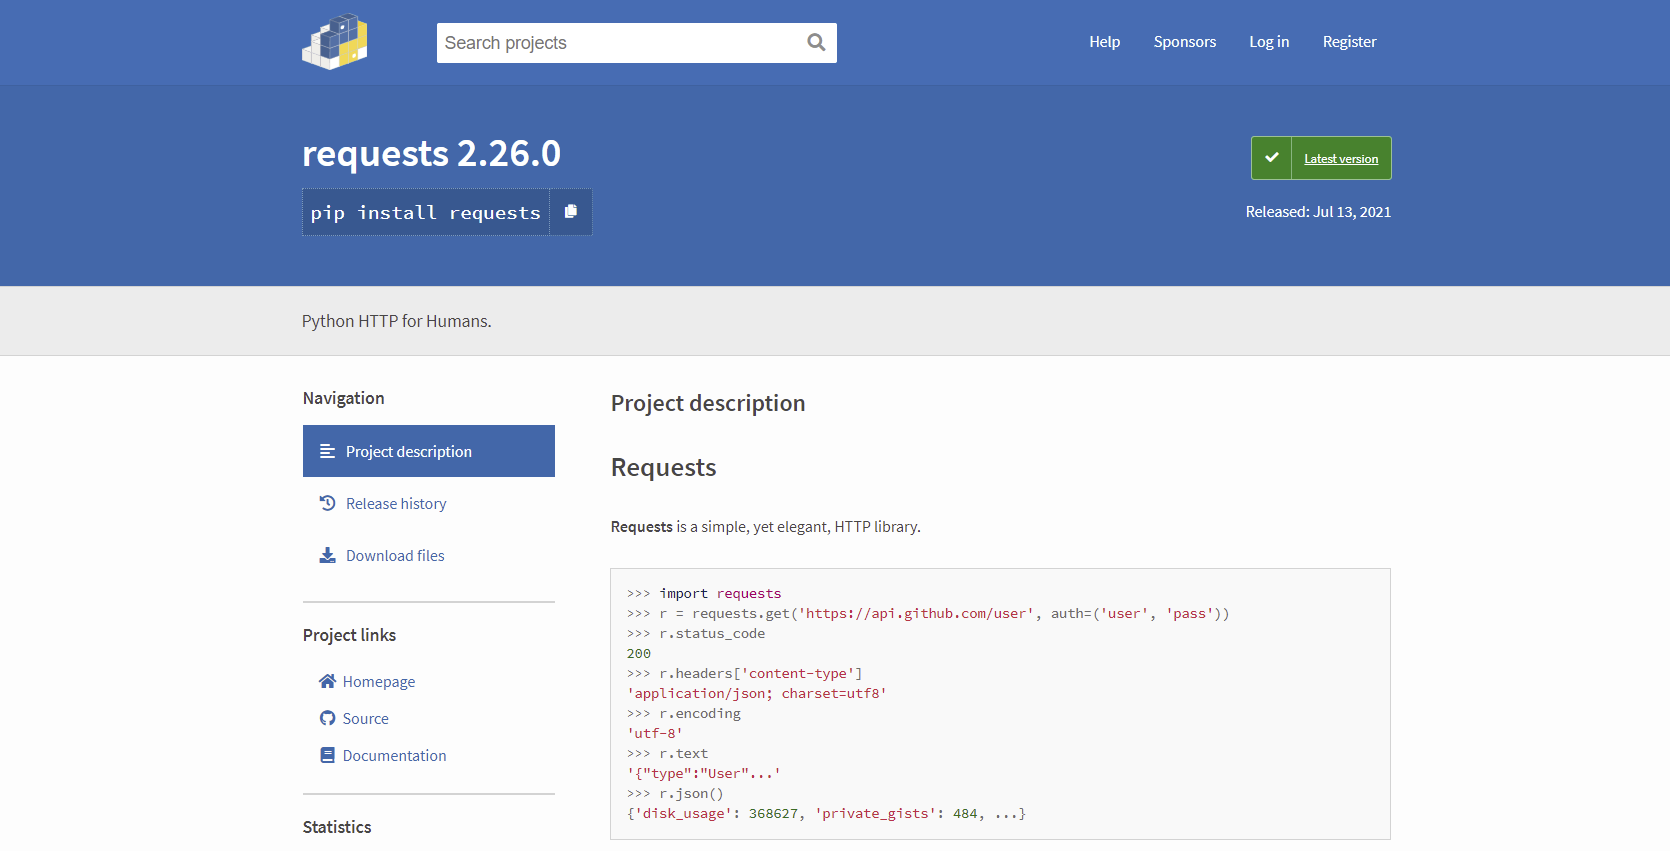

### What is an API?

An API is a set of dedicated URLs (or more generally URIs) that return pure data responses, usually in JSON format.

For more detailed information, see this article from [freeCodeCamp](https://www.freecodecamp.org/news/what-is-an-api-in-english-please-b880a3214a82/).

---
<a id="get"></a>
# GET data by sending a request
[Back to Contents](#Contents)

In the first example, we will send a get request to the server at the address https://api.publicapis.org/entries and look at the response it sends.

Task: take some time to explore the API documentation on [https://api.publicapis.org](https://api.publicapis.org).

In [3]:
# Send a get request to https://api.publicapis.org/entries and record the response 
# to a variable called response

url = 'https://api.publicapis.org/entries'
response = requests.get(url, verify=False)

C:\Users\HappyImafidon\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.publicapis.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


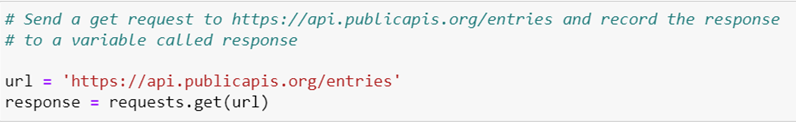

In [4]:
#type the above code in the cell and run it
response

<Response [200]>

In [5]:
# Print the response text below. You will need to use a print statement for this. 
# The output should look something like the below.
#Refer to the documentation or use Google if needed.
print(response.content)

b'{"count":1419,"entries":[{"API":"AdoptAPet","Description":"Resource to help get pets adopted","Auth":"apiKey","HTTPS":true,"Cors":"yes","Link":"https://www.adoptapet.com/public/apis/pet_list.html","Category":"Animals"},{"API":"Axolotl","Description":"Collection of axolotl pictures and facts","Auth":"","HTTPS":true,"Cors":"no","Link":"https://theaxolotlapi.netlify.app/","Category":"Animals"},{"API":"Cat Facts","Description":"Daily cat facts","Auth":"","HTTPS":true,"Cors":"no","Link":"https://alexwohlbruck.github.io/cat-facts/","Category":"Animals"},{"API":"Cataas","Description":"Cat as a service (cats pictures and gifs)","Auth":"","HTTPS":true,"Cors":"no","Link":"https://cataas.com/","Category":"Animals"},{"API":"Cats","Description":"Pictures of cats from Tumblr","Auth":"apiKey","HTTPS":true,"Cors":"no","Link":"https://docs.thecatapi.com/","Category":"Animals"},{"API":"Dog Facts","Description":"Random dog facts","Auth":"","HTTPS":true,"Cors":"yes","Link":"https://dukengn.github.io/Dog

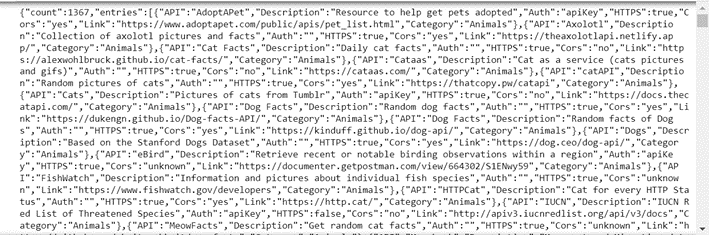

The response came in as data in a **JSON** format.

**JSON** is a common format for the exchange of data between applications. It consists of key-value pairs and lists:

```python
["Cats","Dogs","Elephants"]
{"Content":"Image", "Name":"Cats", "Description":"kittens playing in a garden"}
```

Lists are denoted by square brackets `[` `]` and key-value pairs by curly brackets `{` `}`. Elements are separated by commas.

In the response, we have a key-value pair:
- `"count":1084` is the number of APIs in the dataset
- `"entries":[...]` is a list of entries in the dataset

Each entry in the dataset is then given key-value pairs:
- `"API": "Axolotl"`
- `"Description":"Collection of axolotl pictures and facts"`
- `"Auth":""`
- `"HTTPS":true`
 - `"Cors":"yes"` 
 - `"Link":"https://theaxolotlapi.netlify.app/"`
 - `"Category":"Animals"`
 
 To convert the data in the entries list into a pandas DataFrame, we first load the text into a python dictionary.
 
 The syntax for loading a JSON string into a python dictionary is:
 > json.loads(json_string)
 
Here, **json**.*loads()* refers to the *loads()* function in the **json** package and *json_string* is the string to be converted into a dictionary.

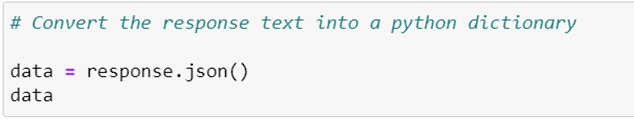

In [6]:
#type the above code and run it
data = response.json()
data

{'count': 1419,
 'entries': [{'API': 'AdoptAPet',
   'Description': 'Resource to help get pets adopted',
   'Auth': 'apiKey',
   'HTTPS': True,
   'Cors': 'yes',
   'Link': 'https://www.adoptapet.com/public/apis/pet_list.html',
   'Category': 'Animals'},
  {'API': 'Axolotl',
   'Description': 'Collection of axolotl pictures and facts',
   'Auth': '',
   'HTTPS': True,
   'Cors': 'no',
   'Link': 'https://theaxolotlapi.netlify.app/',
   'Category': 'Animals'},
  {'API': 'Cat Facts',
   'Description': 'Daily cat facts',
   'Auth': '',
   'HTTPS': True,
   'Cors': 'no',
   'Link': 'https://alexwohlbruck.github.io/cat-facts/',
   'Category': 'Animals'},
  {'API': 'Cataas',
   'Description': 'Cat as a service (cats pictures and gifs)',
   'Auth': '',
   'HTTPS': True,
   'Cors': 'no',
   'Link': 'https://cataas.com/',
   'Category': 'Animals'},
  {'API': 'Cats',
   'Description': 'Pictures of cats from Tumblr',
   'Auth': 'apiKey',
   'HTTPS': True,
   'Cors': 'no',
   'Link': 'https://docs

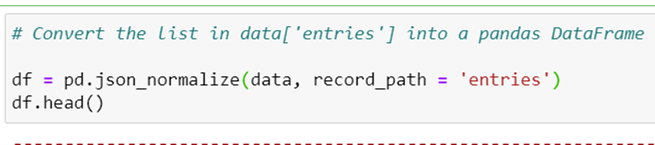

In [7]:
#type the above code here
df = pd.json_normalize(data, record_path = 'entries')
df.head()

,API,Description,Auth,HTTPS,Cors,Link,Category
0,AdoptAPet,Resource to help get pets adopted,apiKey,True,yes,https://www.adoptapet.com/public/apis/pet_list...,Animals
1,Axolotl,Collection of axolotl pictures and facts,,True,no,https://theaxolotlapi.netlify.app/,Animals
2,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
3,Cataas,Cat as a service (cats pictures and gifs),,True,no,https://cataas.com/,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,no,https://docs.thecatapi.com/,Animals


In [17]:
#Use the groupby function to see what categories are available. You will need to count these and sort in descending order.
#The output should look like the following cell below.
#Refer to the documentation for help, or if really stuck ask your PDE.
df[['Category','API']].groupby('Category').count().sort_values(by = 'API', ascending = False)


,API
Category,
Development,121
Games & Comics,95
Government,90
Geocoding,84
Transportation,69
Cryptocurrency,62
Finance,44
Video,43
Social,40


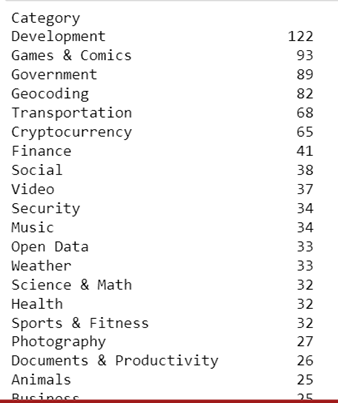

---
<a id="auth"></a>
# Authenticate an API
[Back to Contents](#Contents)

In this example, we will take [TicketMaster](https://developer.ticketmaster.com/products-and-docs/apis/getting-started/) and use the API to find out about events in London.

Task: Open the website associated with the URL and find the documentation. Take some time to explore the API documentation.

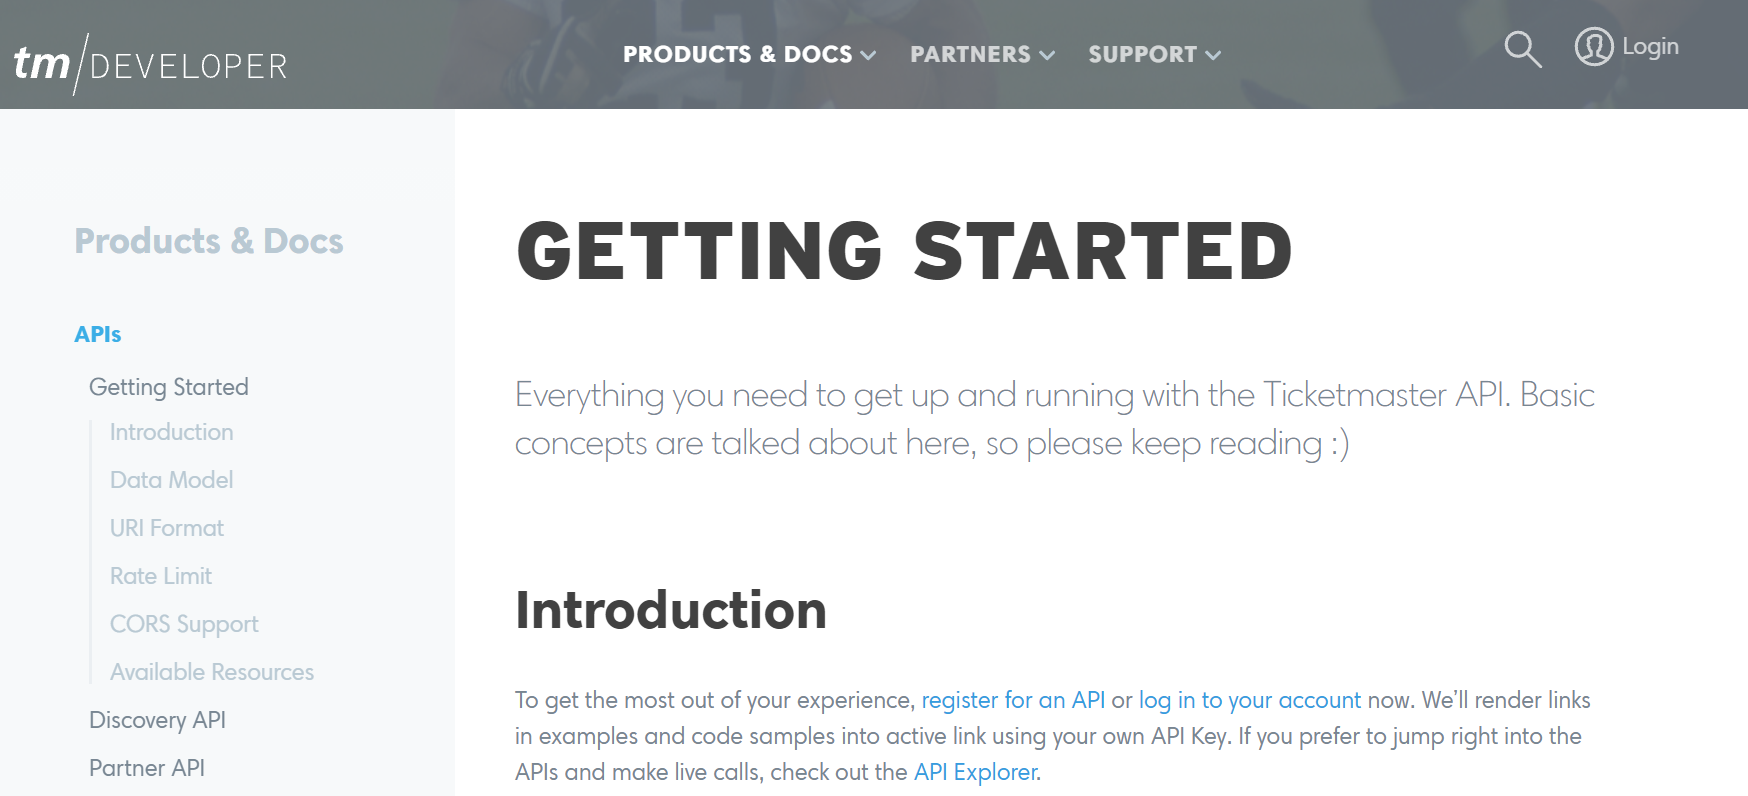

We will navigate the documentation to find out how to use the API. In the documentation, it lists the data model and the URI format.

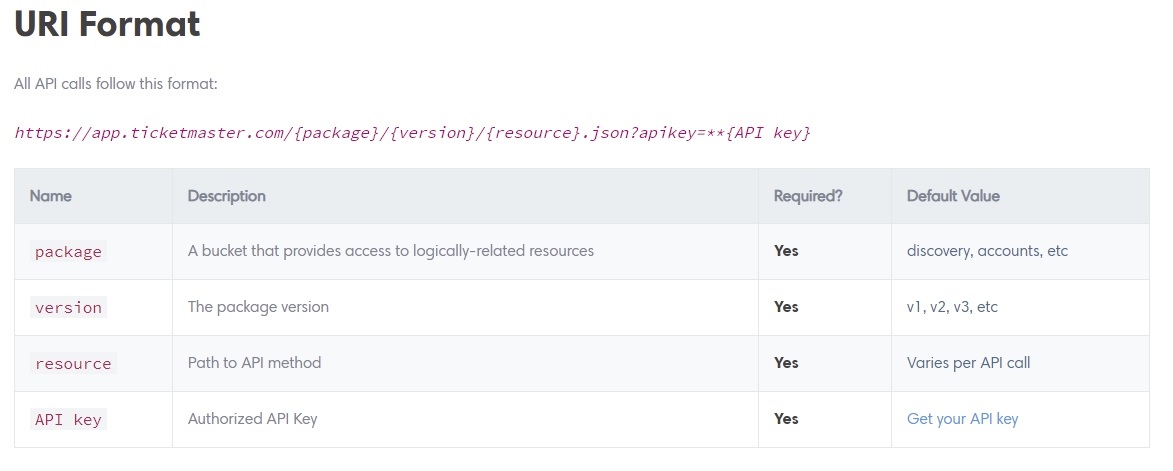

For this example, we need to use the discovery package. Click on **Discovery API** to find out more information about it.

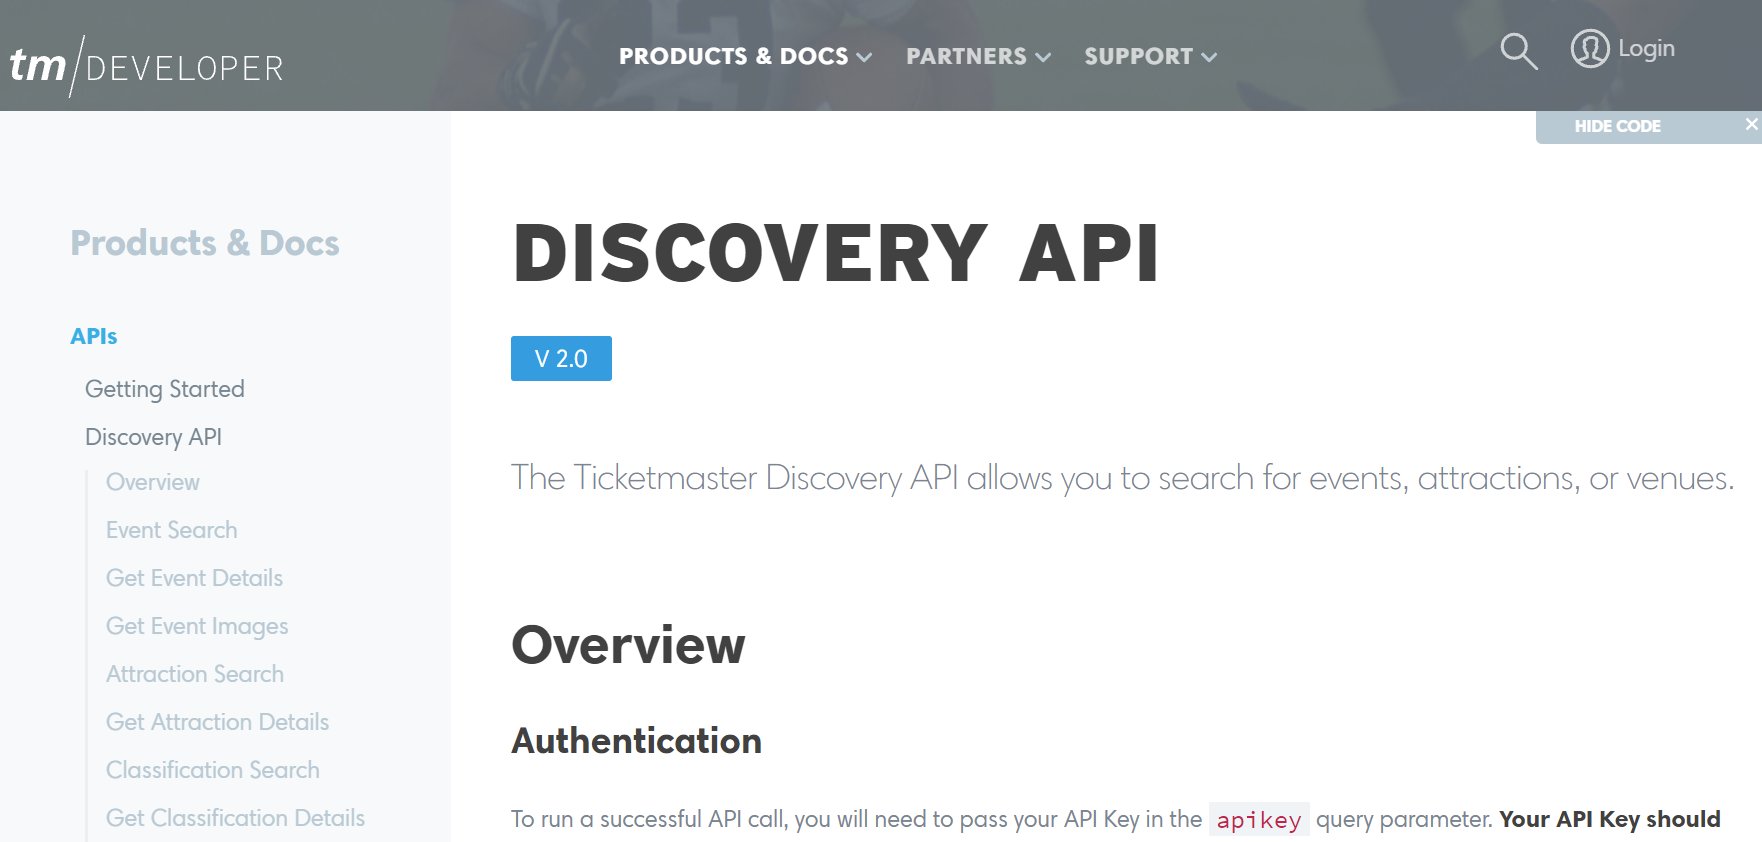

To access this API, we will need to set up a login and create an API key.

Task: Set up a log in on the ticketmaster developer website.

Task: Log in and get your Consumer Key.

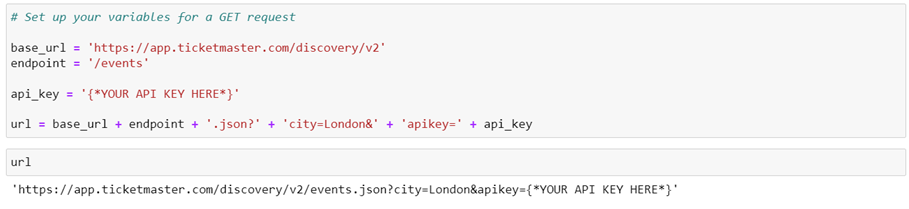

In [27]:
#Type the above code in the relevant cells
#HappyI-App
base_url = 'http://app.ticketmaster.com/discovery/v2'
endpoint = '/events'
api_key = 'Aio1QzB6GGWYR0IJvqy05obAPhwzvPnU'
url = base_url + endpoint +'.json?' + 'city=London&' +'apikey=' + api_key 
url

'http://app.ticketmaster.com/discovery/v2/events.json?city=London&apikey=Aio1QzB6GGWYR0IJvqy05obAPhwzvPnU'

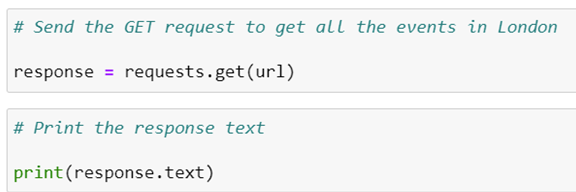

In [28]:
#Type the above code
response = requests.get(url, verify=False)

In [29]:
# Convert the response text into a python dictionary
print(response.text)

{"_embedded":{"events":[{"name":"Harry Potter and the Cursed Child - Parts 1 & 2 Wed 14:00 & 19:00","type":"event","id":"G5djZpm9MhJIM","test":false,"url":"https://theatre.ticketmaster.co.uk/book/17YYA-harry-potter-and-the-cursed-child/#perf=17YYA-28A&date=2022-02-23&time=2.00PM","locale":"en-us","images":[{"ratio":"3_2","url":"https://s1.ticketm.net/dam/a/5f2/811a0e95-2929-478d-bc36-8784864195f2_1469761_RETINA_PORTRAIT_3_2.jpg","width":640,"height":427,"fallback":false},{"ratio":"4_3","url":"https://s1.ticketm.net/dam/a/5f2/811a0e95-2929-478d-bc36-8784864195f2_1469761_CUSTOM.jpg","width":305,"height":225,"fallback":false},{"ratio":"16_9","url":"https://s1.ticketm.net/dam/a/5f2/811a0e95-2929-478d-bc36-8784864195f2_1469761_RECOMENDATION_16_9.jpg","width":100,"height":56,"fallback":false},{"ratio":"16_9","url":"https://s1.ticketm.net/dam/a/5f2/811a0e95-2929-478d-bc36-8784864195f2_1469761_RETINA_PORTRAIT_16_9.jpg","width":640,"height":360,"fallback":false},{"ratio":"16_9","url":"https://s

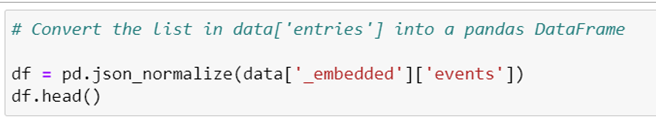

In [32]:
new = response.json()


In [34]:
new1 = pd.json_normalize(new['_embedded']['events'])
new1
# df = pd.json_normalize(data, record_path = 'entries')
# df.head()

,name,type,id,test,url,locale,images,classifications,sales.public.startDateTime,sales.public.startTBD,...,dates.start.noSpecificTime,dates.timezone,dates.status.code,dates.spanMultipleDays,ageRestrictions.legalAgeEnforced,_links.self.href,_links.attractions,_links.venues,_embedded.venues,_embedded.attractions
0,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9MhJIM,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9MhJIM?locale=en-us,[{'href': '/discovery/v2/attractions/K8vZ917p1...,[{'href': '/discovery/v2/venues/KovZ9177gU0?lo...,"[{'name': 'Palace Theatre', 'type': 'venue', '...",[{'name': 'Harry Potter and the Cursed Child (...
1,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9MhJIy,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9MhJIy?locale=en-us,[{'href': '/discovery/v2/attractions/K8vZ917p1...,[{'href': '/discovery/v2/venues/KovZ9177gU0?lo...,"[{'name': 'Palace Theatre', 'type': 'venue', '...",[{'name': 'Harry Potter and the Cursed Child (...
2,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9MhJIX,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9MhJIX?locale=en-us,[{'href': '/discovery/v2/attractions/K8vZ917p1...,[{'href': '/discovery/v2/venues/KovZ9177gU0?lo...,"[{'name': 'Palace Theatre', 'type': 'venue', '...",[{'name': 'Harry Potter and the Cursed Child (...
3,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9MhUtZ,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9MhUtZ?locale=en-us,[{'href': '/discovery/v2/attractions/K8vZ917p1...,[{'href': '/discovery/v2/venues/KovZ9177gU0?lo...,"[{'name': 'Palace Theatre', 'type': 'venue', '...",[{'name': 'Harry Potter and the Cursed Child (...
4,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9MhUt7,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9MhUt7?locale=en-us,[{'href': '/discovery/v2/attractions/K8vZ917p1...,[{'href': '/discovery/v2/venues/KovZ9177gU0?lo...,"[{'name': 'Palace Theatre', 'type': 'venue', '...",[{'name': 'Harry Potter and the Cursed Child (...
5,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9MjktG,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9MjktG?locale=en-us,[{'href': '/discovery/v2/attractions/K8vZ917p1...,[{'href': '/discovery/v2/venues/KovZ9177gU0?lo...,"[{'name': 'Palace Theatre', 'type': 'venue', '...",[{'name': 'Harry Potter and the Cursed Child (...
6,Harry Potter and the Cursed Child - Parts 1 & ...,event,G5djZpm9Mjkt4,False,https://theatre.ticketmaster.co.uk/book/17YYA-...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",2021-07-06T09:00:00Z,False,...,False,Europe/London,onsale,False,False,/discovery/v2/events/G5djZpm9Mjkt